In [1]:
# Imports dependencies
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the timesfm model (CPU version)
import timesfm

 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.11 (main, Mar  7 2025, 10:33:09) [Clang 16.0.0 (clang-1600.0.26.6)].


In [3]:
# Importing in the 200m parameter
tfm_one = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="cpu",
          per_core_batch_size=32,
          horizon_len=36,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-1.0-200m-pytorch"),
  )

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
# Importing in the 500m parameter
tfm_two = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="cpu",
          per_core_batch_size=32,
          horizon_len=36,
          num_layers=50,
          use_positional_embedding=False,
          context_len=2048,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
# Importing in the elc dataset
elc = pd.read_csv("dataset_for_internship.csv")

In [6]:
# Visualizing the elc dataset
elc.head()
# elc.shape

TS_ID        cal_month_date   units
0  ID_1  2022-01-01T00:00:00Z   99973
1  ID_1  2022-11-01T00:00:00Z  149595
2  ID_1  2022-05-01T00:00:00Z  110292
3  ID_1  2022-07-01T00:00:00Z  130055
4  ID_1  2022-08-01T00:00:00Z  133857

In [7]:
# Renaming columns of the elc dataset
elc_data = elc.rename(columns={'cal_month_date': 'ds', 'units': 'values', 'TS_ID': 'unique_id'})

In [8]:
elc_data.head()

unique_id                    ds  values
0      ID_1  2022-01-01T00:00:00Z   99973
1      ID_1  2022-11-01T00:00:00Z  149595
2      ID_1  2022-05-01T00:00:00Z  110292
3      ID_1  2022-07-01T00:00:00Z  130055
4      ID_1  2022-08-01T00:00:00Z  133857

In [9]:
# Reindexing of the elc dataset
order = ['ds', 'values', 'unique_id']
elc_data = elc_data.reindex(columns = order)

In [10]:
elc_data.head()
elc_data.shape

(468, 3)

In [11]:
type(elc_data['ds'][0])
print(elc_data['ds'][0])

2022-01-01T00:00:00Z


In [12]:
# Converting the string datetime representation to a datetime representation
elc_data['ds'] = pd.to_datetime(elc_data['ds'])
type(elc_data['ds'][0])
print(elc_data['ds'][0])

2022-01-01 00:00:00+00:00


In [13]:
# Sorting values because they are out of order
elc_data.sort_values('ds', inplace=True)

In [14]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(elc_data)

In [15]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(elc)

In [16]:
# Calling the forecast_on_df method for the 200m parameter mode;
forecast_context_len = 468

forecast_df_200m_36_468 = tfm_one.forecast_on_df(
    inputs=elc_data,
    freq='M',
    forecast_context_len = forecast_context_len,
    value_name = 'values', 
    model_name = 'timesfm',
    normalize = True,
    verbose = True,
)

Processing dataframe with single process.
Finished preprocessing dataframe.
Finished forecasting.


/Users/anaresh/Library/Caches/pypoetry/virtualenvs/timesfm-elc-2jtdsose-py3.11/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/anaresh/Library/Caches/pypoetry/virtualenvs/timesfm-elc-2jtdsose-py3.11/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [17]:
forecast_df_200m_36_468.head()
forecast_df_200m_36_468.shape

(432, 12)

In [18]:
# Calling the forecast_on_df method for the 500m parameter mode;
forecast_context_len = 468

forecast_df_500m_36_468 = tfm_two.forecast_on_df(
    inputs=elc_data,
    freq='M',
    forecast_context_len = forecast_context_len,
    value_name = 'values', 
    model_name = 'timesfm',
    normalize = True,
    verbose = True,
)


Processing dataframe with single process.
Finished preprocessing dataframe.
Finished forecasting.


/Users/anaresh/Library/Caches/pypoetry/virtualenvs/timesfm-elc-2jtdsose-py3.11/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/anaresh/Library/Caches/pypoetry/virtualenvs/timesfm-elc-2jtdsose-py3.11/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [19]:
# Displaying the full dataset
forecast_df_500m_36_468.head()
forecast_df_500m_36_468.shape
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(forecast_df_500m_128_468)

(432, 12)

In [20]:
elc_forecast_200m = forecast_df_200m_36_468[['unique_id', 'ds', 'timesfm-q-0.5']]
elc_forecast_500m = forecast_df_500m_36_468[['unique_id', 'ds', 'timesfm-q-0.5']]
elc_forecast_200m.to_csv('elc_forecast_200m')
elc_forecast_500m.to_csv('elc_forecast_500m')

In [21]:
# Figuring out the number of unique_ids
unique_ids = elc_forecast_200m['unique_id'].unique()
n_ids = len(unique_ids)
print(n_ids)

12


In [23]:
print(elc_combined_200m.shape)
print(elc_combined_500m.shape)

(900, 4)
(900, 4)


In [24]:
elc_data.head()

ds  values unique_id
390 2021-10-01 00:00:00+00:00  138824     ID_11
75  2021-10-01 00:00:00+00:00   96191      ID_2
359 2021-10-01 00:00:00+00:00  299103     ID_10
89  2021-10-01 00:00:00+00:00  124408      ID_3
245 2021-10-01 00:00:00+00:00   47133      ID_7

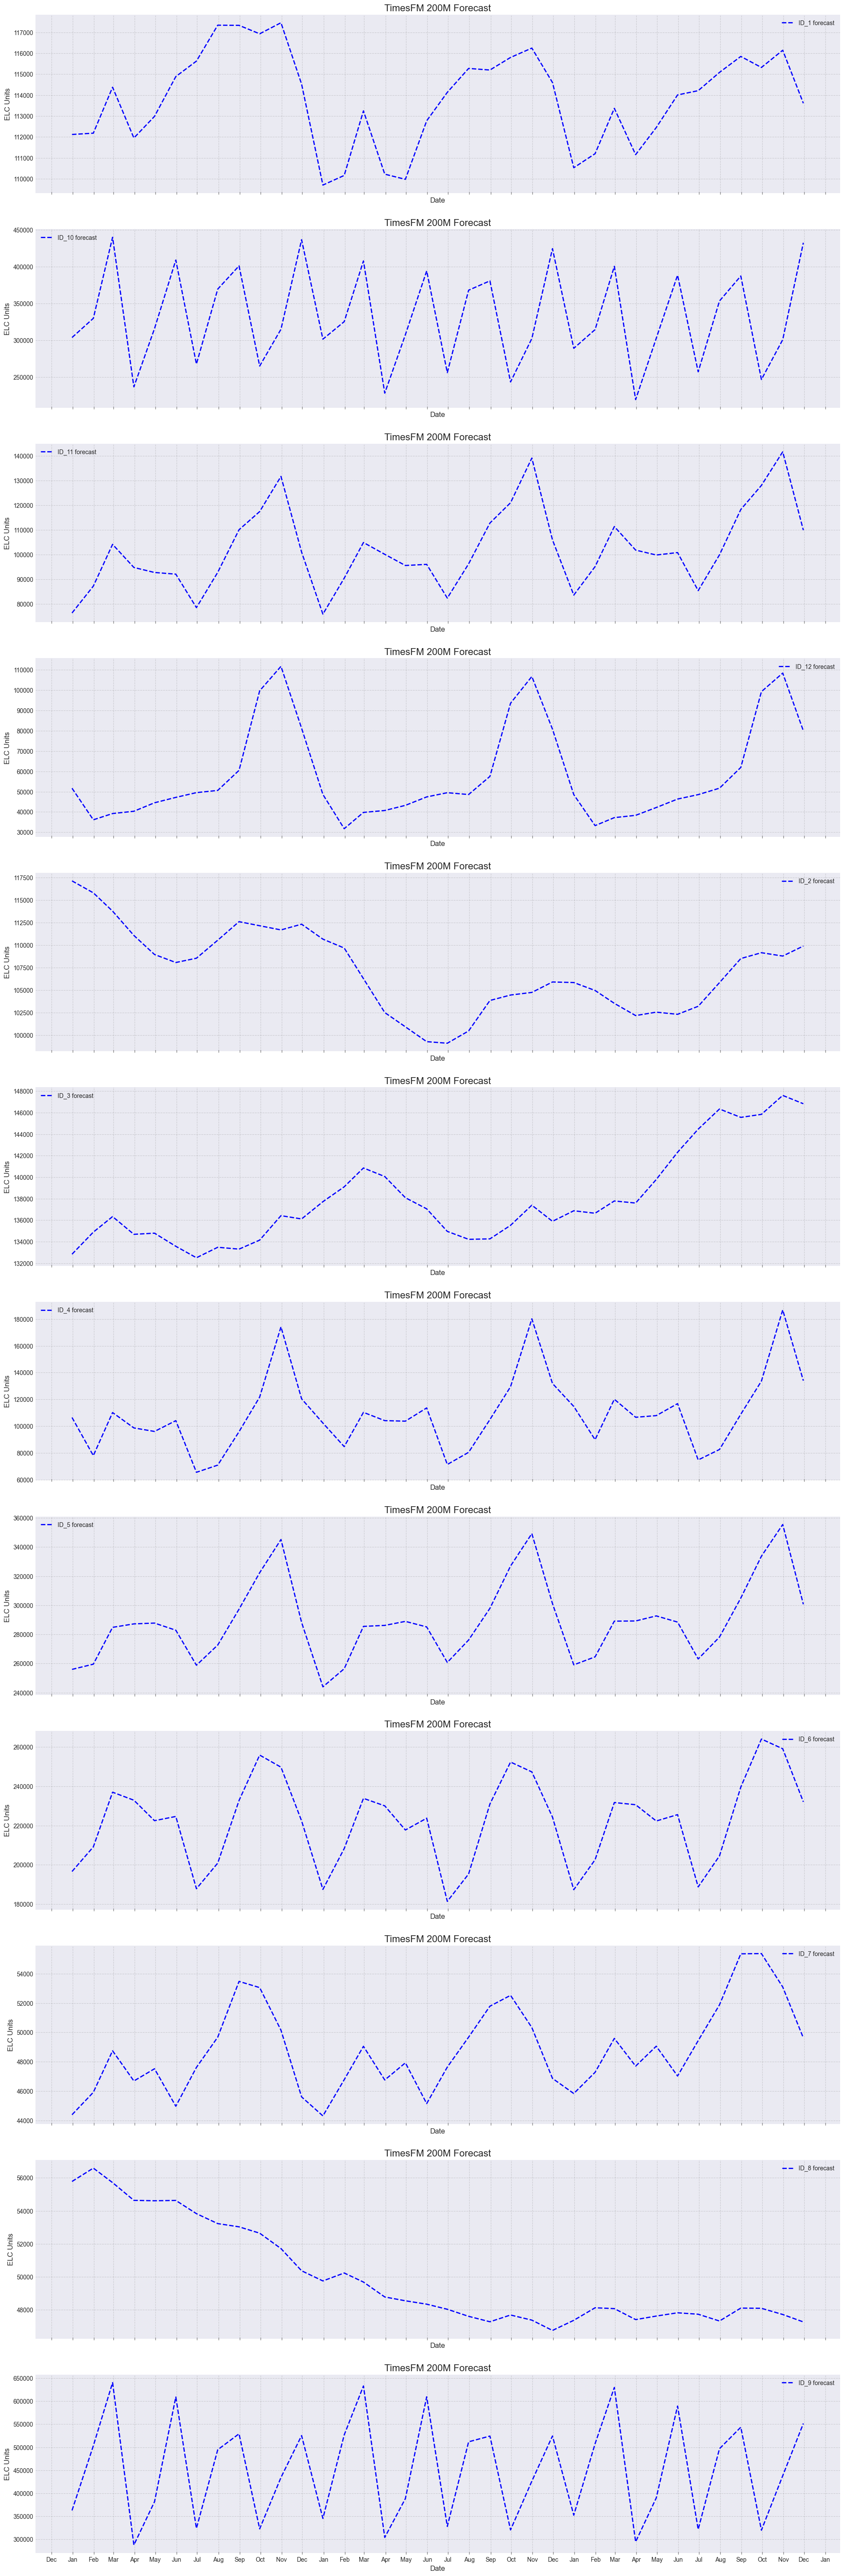

In [25]:
# Plotting the data
# Setup the plot environment
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(n_ids, 1, figsize=(20, 5 * n_ids), sharex=True)

# Plot TimesFM 200M Forecast
for ax, data_id in zip(axs, unique_ids):
    elc_forecast_200m_subset = elc_forecast_200m[elc_forecast_200m['unique_id'] == data_id]
    ax.plot(elc_forecast_200m_subset['ds'], elc_forecast_200m_subset['timesfm-q-0.5'], linestyle='--', linewidth=2, color='blue', label=data_id + ' forecast')

    # Setting the formatting of the Date labels
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    
    ax.set_title("TimesFM 200M Forecast", fontsize=16)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("ELC Units", fontsize=12)
    ax.legend()
    ax.tick_params(axis='x', length=5, width=1, color='gray', direction='inout', grid_linestyle='--')
    ax.grid(True, linestyle='--', alpha=0.3, color='gray')
plt.tight_layout(pad=2.5)
plt.savefig('elc_forecast_200m.png', dpi = 330)
# plt.show()

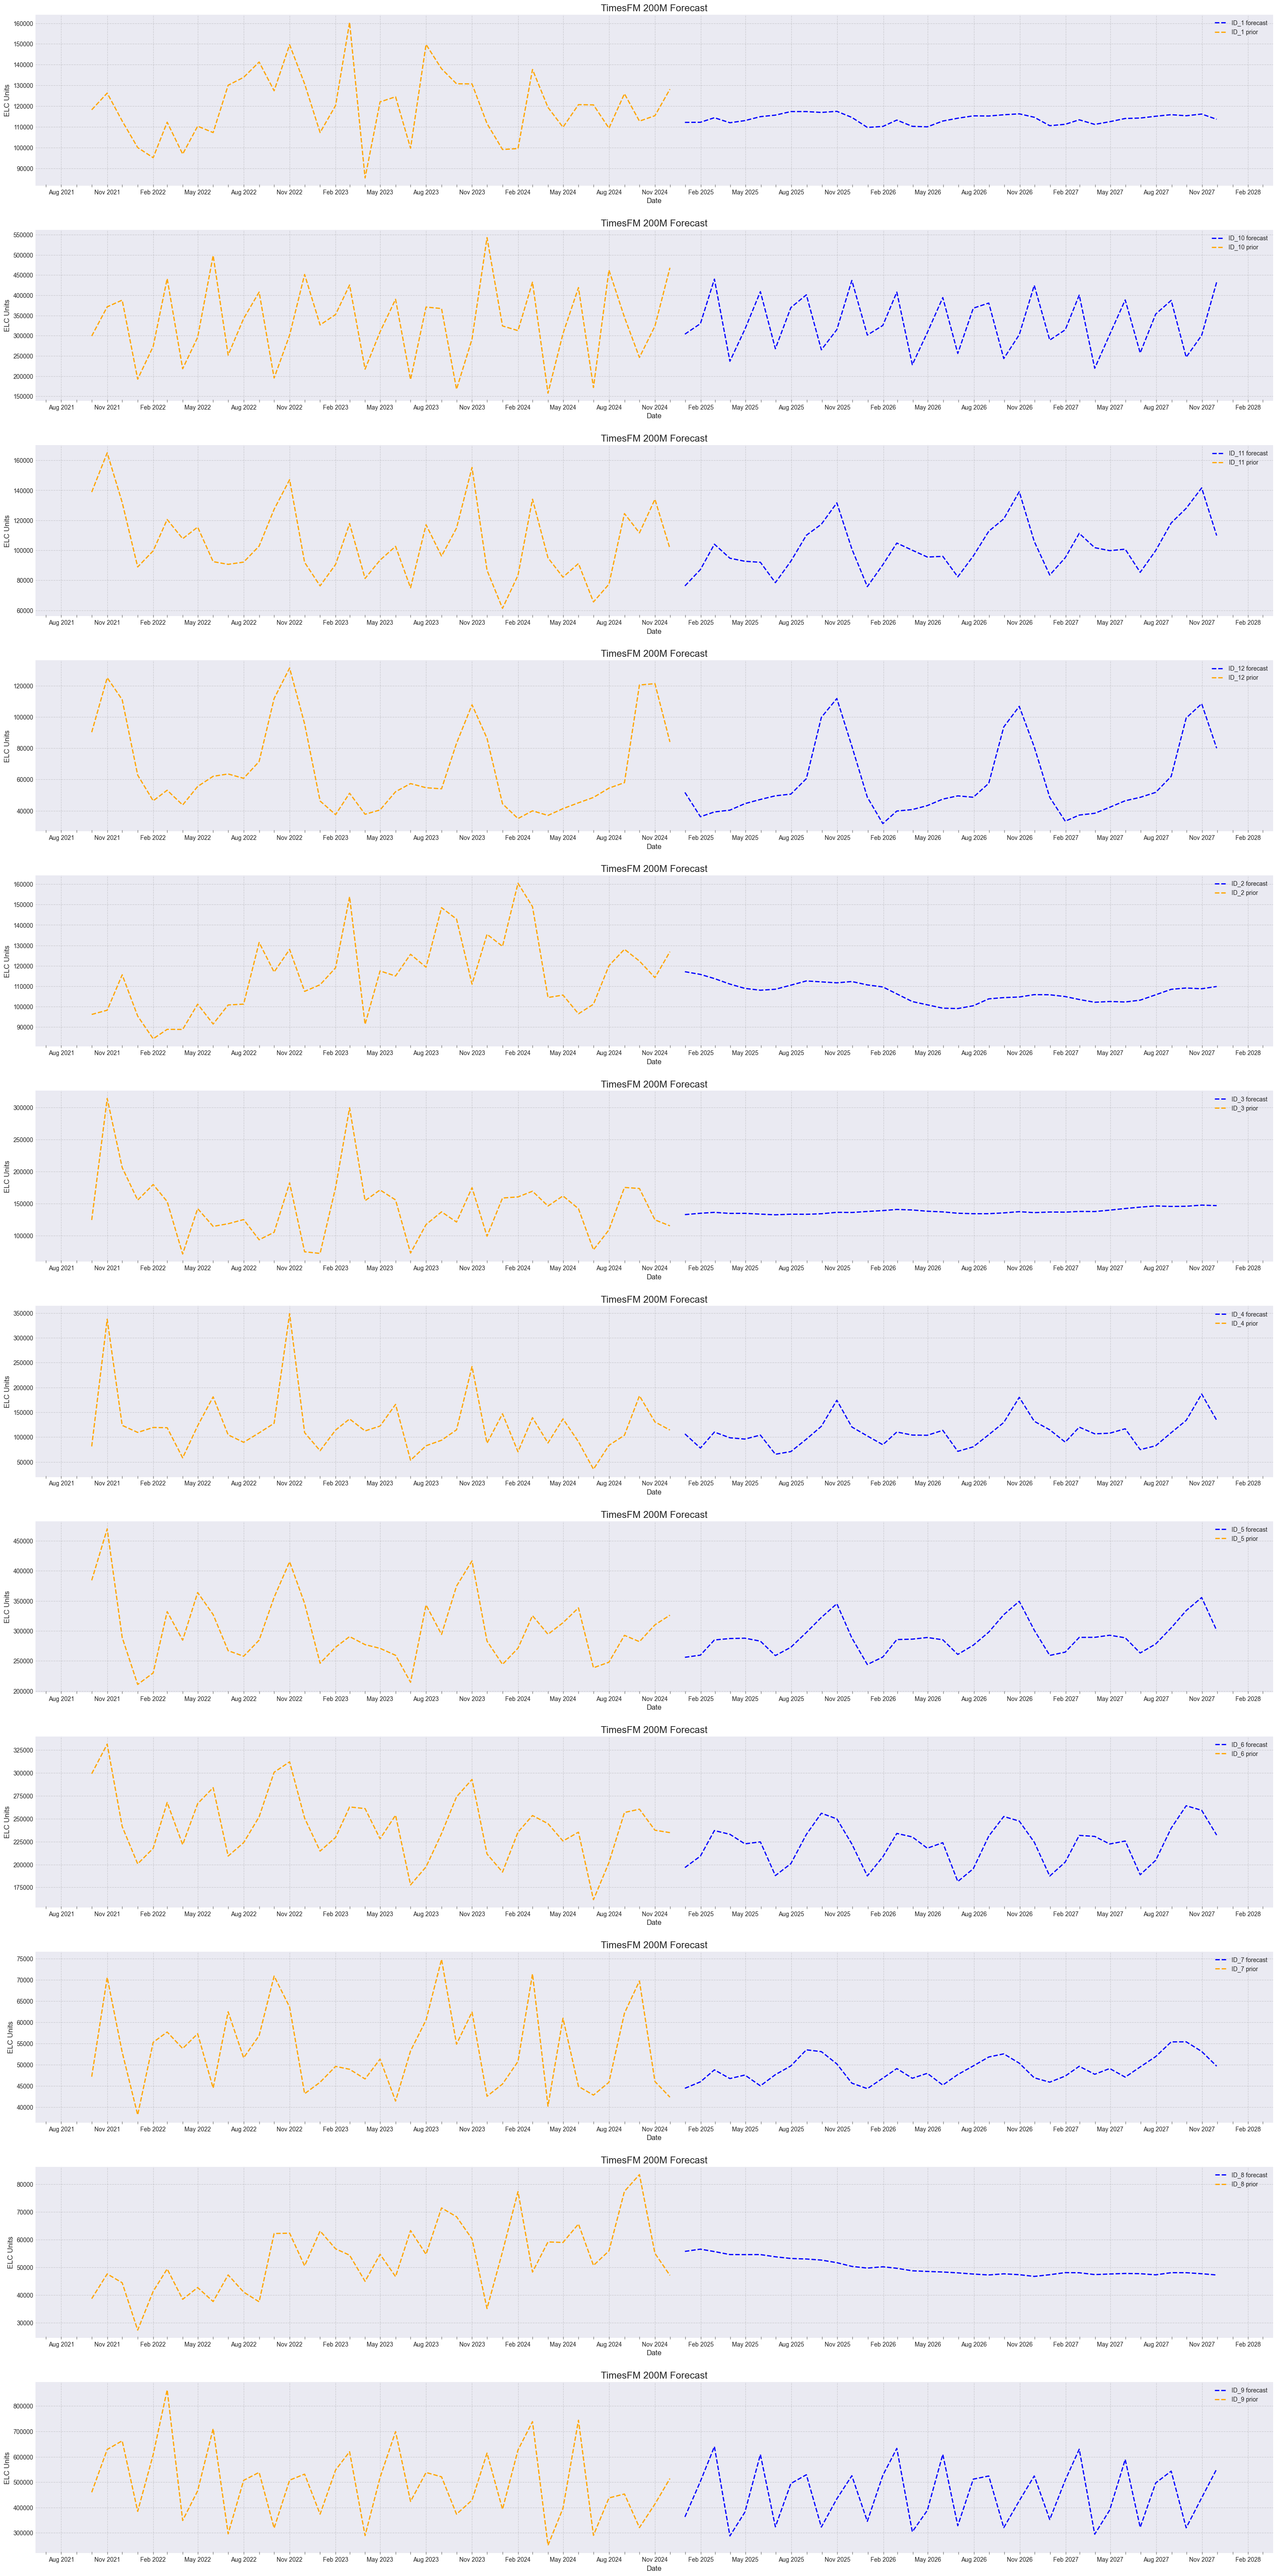

In [26]:
# Plotting the data
# Setup the plot environment
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(n_ids, 1, figsize=(30, 5 * n_ids), sharex=True)

# Plot TimesFM 200M Forecast
for ax, data_id in zip(axs, unique_ids):
    elc_forecast_200m_subset = elc_forecast_200m[elc_forecast_200m['unique_id'] == data_id]
    ax.plot(elc_forecast_200m_subset['ds'], elc_forecast_200m_subset['timesfm-q-0.5'], linestyle='--', linewidth=2, color='blue', label=data_id + ' forecast')
    
for ax, data_id in zip(axs, unique_ids):
    elc_prior = elc_data[elc_data['unique_id'] == data_id]
    ax.plot(elc_prior['ds'], elc_prior['values'], linestyle='--', linewidth=2, color='orange', label=data_id + ' prior')

    # Setting the formatting of the Date labels
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    ax.set_title("TimesFM 200M Forecast", fontsize=16)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("ELC Units", fontsize=12)
    
    ax.tick_params(axis='x', length=5, width=1, color='gray', direction='inout', grid_linestyle='--')
    ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray', direction='inout', grid_linestyle='--')

    ax.tick_params(axis='x', labelbottom=True)
    ax.grid(True, linestyle='--', alpha=0.3, color='gray')
    ax.legend()
    
plt.tight_layout(pad=2.5)
plt.savefig('elc_forecast_combined_200m.png', dpi = 330)
# plt.show()

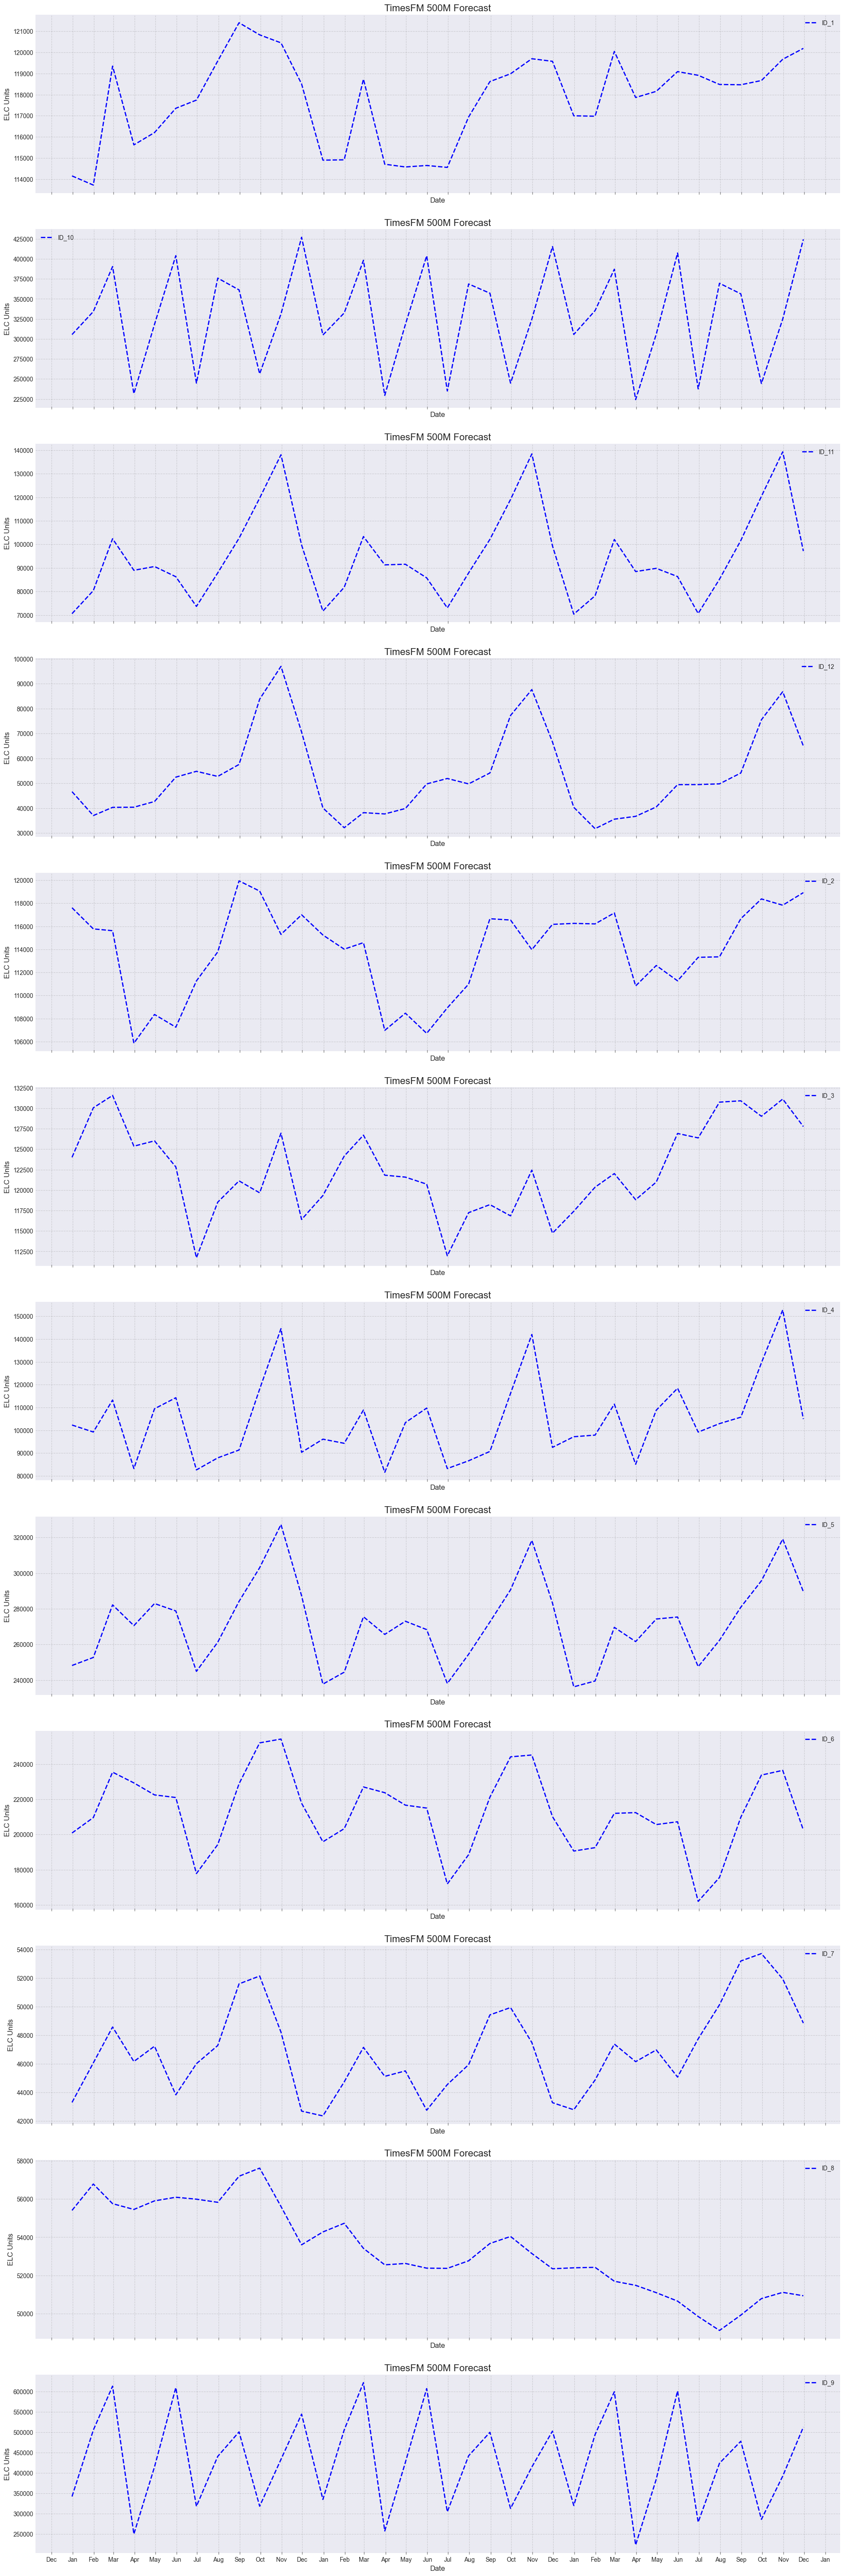

In [27]:
# Calculating unique_ids for the 500M model
unique_ids = elc_forecast_500m['unique_id'].unique()
n_ids = len(unique_ids)

# Plotting the data
# Setup the plot environment
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(n_ids, 1, figsize=(20, 5 * n_ids), sharex=True)

# Plot TimesFM 500M Forecast
for ax, data_id in zip(axs, unique_ids):
    elc_forecast_500m_subset = elc_forecast_500m[elc_forecast_500m['unique_id'] == data_id]
    ax.plot(elc_forecast_500m_subset['ds'], elc_forecast_500m_subset['timesfm-q-0.5'], linestyle='--', linewidth=2, color='blue', label=data_id)
    
    # Setting the formatting of the Date labels
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    
    ax.set_title("TimesFM 500M Forecast", fontsize=16)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("ELC Units", fontsize=12)
    ax.legend()
    ax.tick_params(axis='x', length=5, width=1, color='gray', direction='inout', grid_linestyle='--')
    ax.grid(True, linestyle='--', alpha=0.3, color='gray')

plt.tight_layout(pad=2.5)
plt.savefig('elc_forecast_500m.png', dpi = 330)
plt.show()

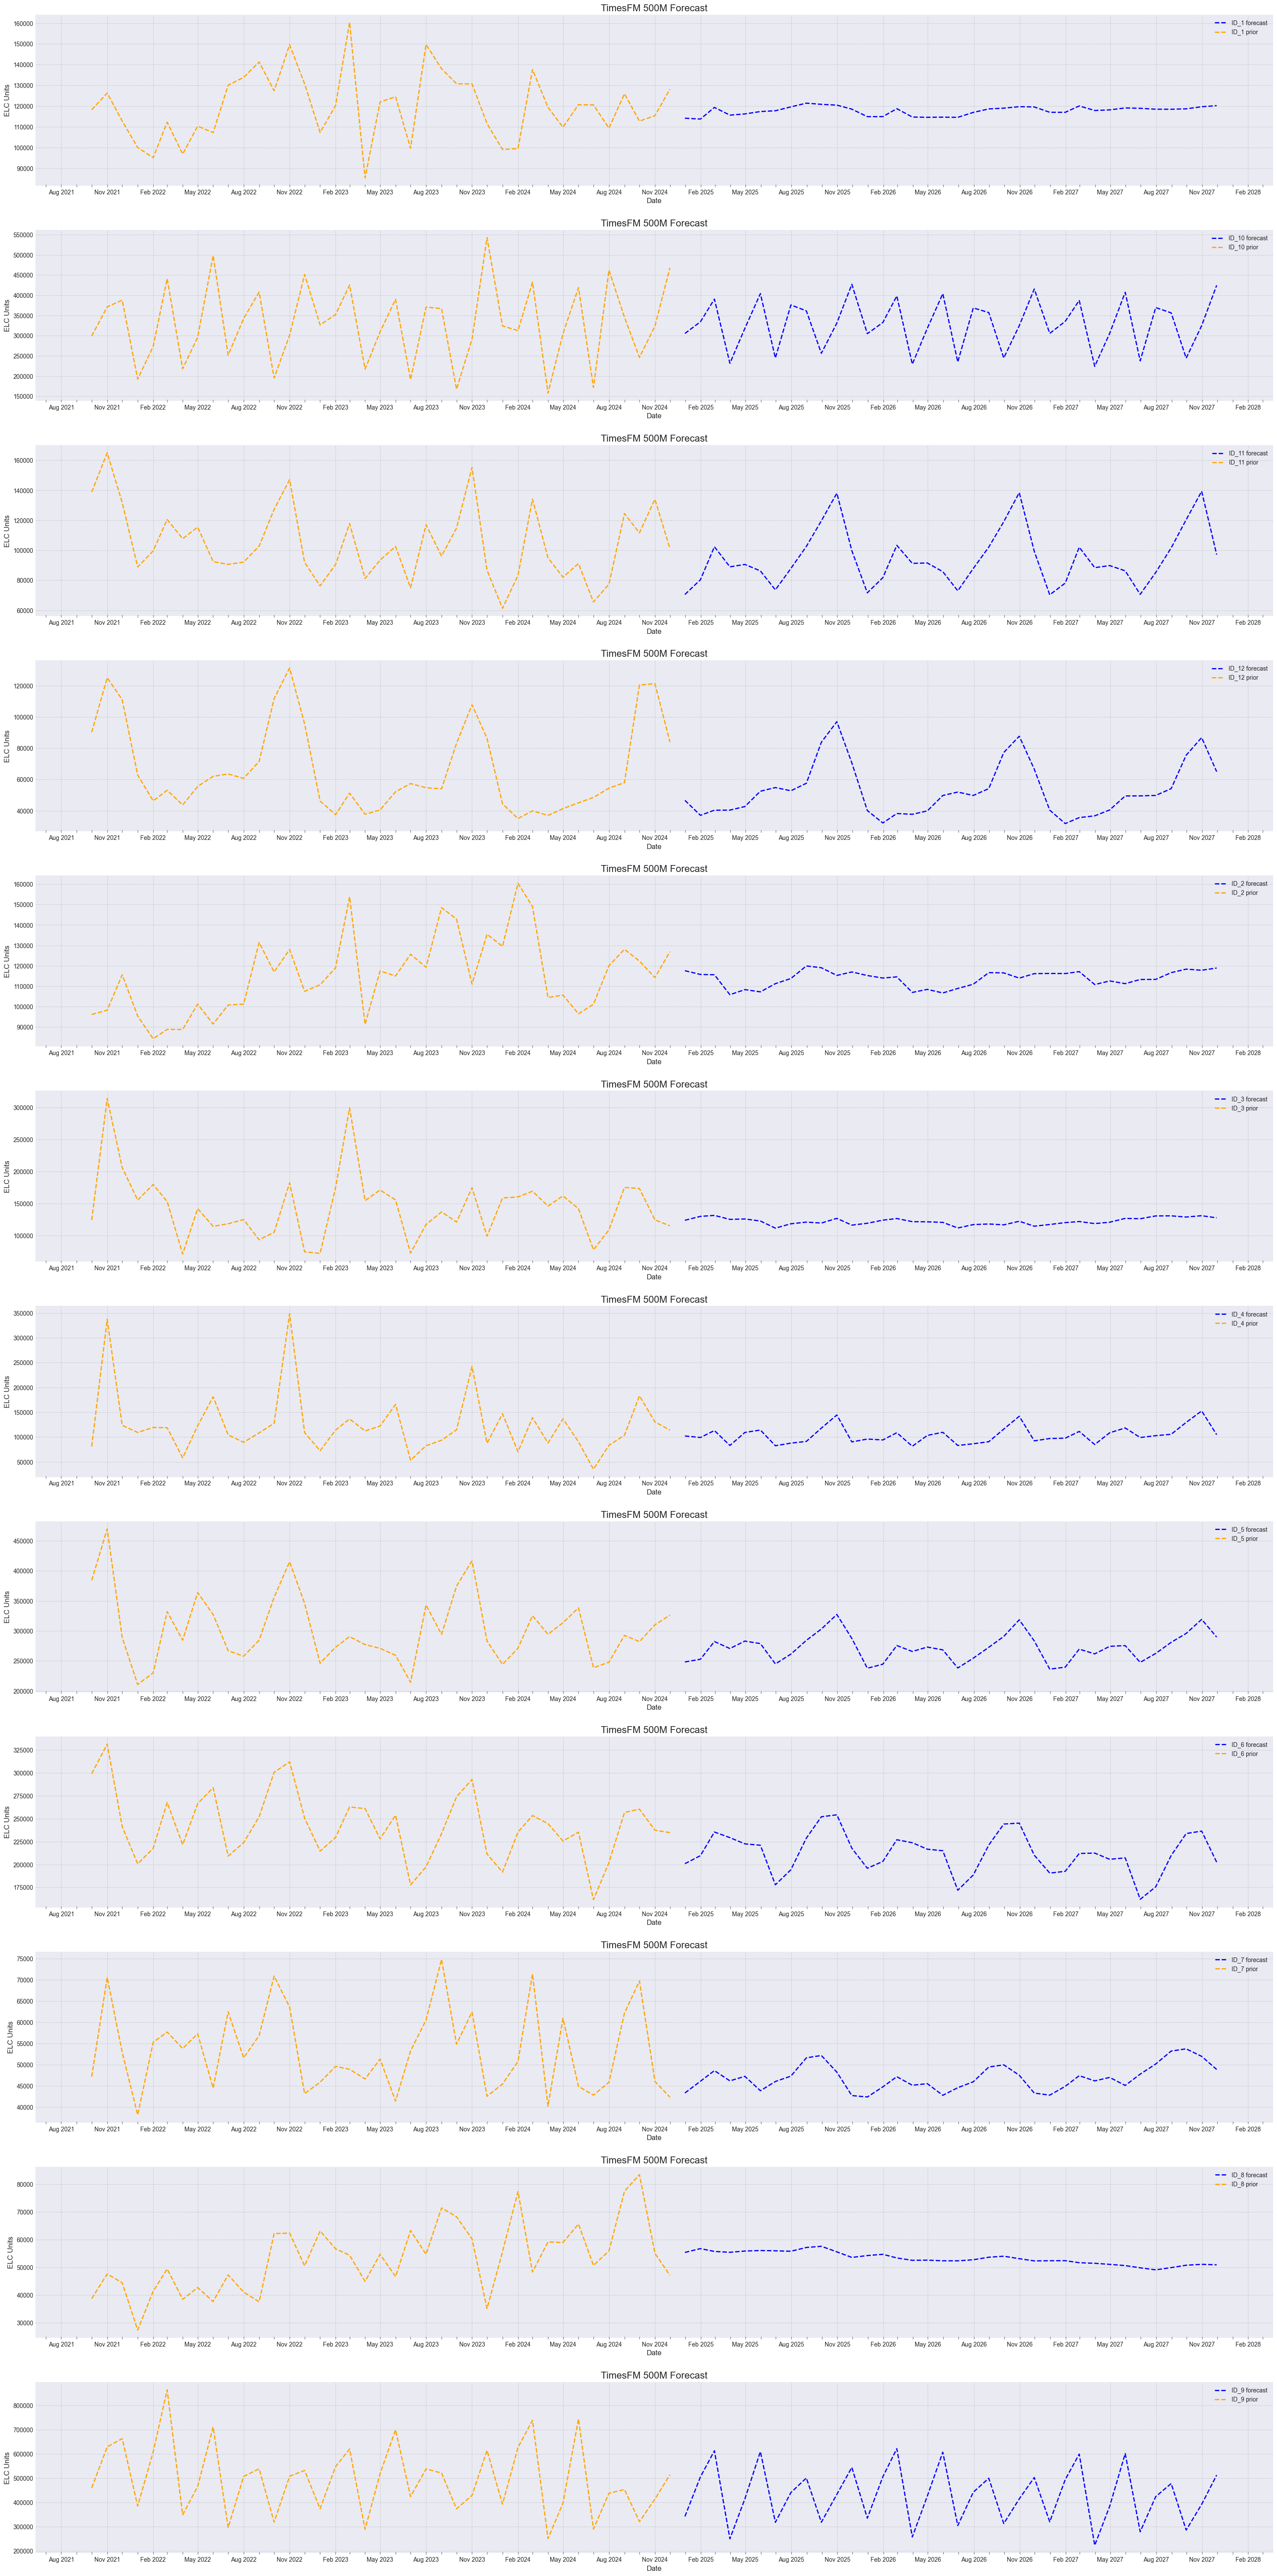

In [28]:
# Calculating unique_ids for the 500M model
unique_ids = elc_forecast_500m['unique_id'].unique()
n_ids = len(unique_ids)

# Plotting the data
# Setup the plot environment
plt.style.use('seaborn-v0_8-darkgrid')
fig, axs = plt.subplots(n_ids, 1, figsize=(30, 5 * n_ids), sharex=True)

# Plot TimesFM 500M Forecast
for ax, data_id in zip(axs, unique_ids):
    elc_forecast_500m_subset = elc_forecast_500m[elc_forecast_500m['unique_id'] == data_id]
    ax.plot(elc_forecast_500m_subset['ds'], elc_forecast_500m_subset['timesfm-q-0.5'], linestyle='--', linewidth=2, color='blue', label=data_id + ' forecast')
    
for ax, data_id in zip(axs, unique_ids):
    elc_prior = elc_data[elc_data['unique_id'] == data_id]
    ax.plot(elc_prior['ds'], elc_prior['values'], linestyle='--', linewidth=2, color='orange', label=data_id + ' prior')

    # Setting the formatting of the Date labels
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    
    ax.set_title("TimesFM 500M Forecast", fontsize=16)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("ELC Units", fontsize=12)
    
    ax.tick_params(axis='x', length=5, width=1, color='gray', direction='inout', grid_linestyle='--')
    ax.tick_params(axis='x', which='minor', length=5, width=1, color='gray', direction='inout', grid_linestyle='--')

    ax.tick_params(axis='x', labelbottom=True)
    ax.grid(True, linestyle='--', alpha=0.3, color='gray')
    ax.legend()

plt.tight_layout(pad=2.5)
plt.savefig('elc_forecast_combined_500m.png', dpi = 330)
plt.show()

In [35]:
elc_forecast_200m = elc_forecast_200m.rename(columns={'timesfm-q-0.5': 'values'})
elc_forecast_200m.head()

unique_id                        ds         values
0      ID_1 2024-12-31 00:00:00+00:00  112118.015625
1      ID_1 2025-01-31 00:00:00+00:00  112179.328125
2      ID_1 2025-02-28 00:00:00+00:00  114377.968750
3      ID_1 2025-03-31 00:00:00+00:00  111949.921875
4      ID_1 2025-04-30 00:00:00+00:00  112983.460938

In [36]:
elc_forecast_500m = elc_forecast_500m.rename(columns={'timesfm-q-0.5': 'values'})
elc_forecast_500m.head()

unique_id                        ds         values
0      ID_1 2024-12-31 00:00:00+00:00  114151.812500
1      ID_1 2025-01-31 00:00:00+00:00  113717.789062
2      ID_1 2025-02-28 00:00:00+00:00  119352.882812
3      ID_1 2025-03-31 00:00:00+00:00  115621.867188
4      ID_1 2025-04-30 00:00:00+00:00  116205.007812

In [33]:
elc_data.head()

ds  values unique_id
390 2021-10-01 00:00:00+00:00  138824     ID_11
75  2021-10-01 00:00:00+00:00   96191      ID_2
359 2021-10-01 00:00:00+00:00  299103     ID_10
89  2021-10-01 00:00:00+00:00  124408      ID_3
245 2021-10-01 00:00:00+00:00   47133      ID_7

In [40]:
print(type(elc_data.loc[0, 'ds']))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [41]:
elc_data['ds'] = elc_data['ds'].dt.strftime('%Y-%m-%d')
elc_data.head()

ds  values unique_id
390  2021-10-01  138824     ID_11
75   2021-10-01   96191      ID_2
359  2021-10-01  299103     ID_10
89   2021-10-01  124408      ID_3
245  2021-10-01   47133      ID_7

In [42]:
elc_forecast_200m['ds'] = elc_forecast_200m['ds'].dt.strftime('%Y-%m-%d')
elc_forecast_200m.head()

unique_id          ds         values
0      ID_1  2024-12-31  112118.015625
1      ID_1  2025-01-31  112179.328125
2      ID_1  2025-02-28  114377.968750
3      ID_1  2025-03-31  111949.921875
4      ID_1  2025-04-30  112983.460938

In [43]:
elc_forecast_500m['ds'] = elc_forecast_500m['ds'].dt.strftime('%Y-%m-%d')
elc_forecast_500m.head()

unique_id          ds         values
0      ID_1  2024-12-31  114151.812500
1      ID_1  2025-01-31  113717.789062
2      ID_1  2025-02-28  119352.882812
3      ID_1  2025-03-31  115621.867188
4      ID_1  2025-04-30  116205.007812

In [47]:
elc_200m_combined = pd.concat([elc_data, elc_forecast_200m], ignore_index=True)
elc_200m_combined.head()
elc_200m_combined.to_csv('elc_200m_combined')

In [48]:
elc_500m_combined = pd.concat([elc_data, elc_forecast_500m], ignore_index=True)
elc_500m_combined.to_csv('elc_500m_combined')
elc_500m_combined.head()

ds    values unique_id
0  2021-10-01  138824.0     ID_11
1  2021-10-01   96191.0      ID_2
2  2021-10-01  299103.0     ID_10
3  2021-10-01  124408.0      ID_3
4  2021-10-01   47133.0      ID_7